In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import random

In [121]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 100000)

mu, sigma = 1, 0.4
s1 = np.random.normal(mu, sigma, 100000)

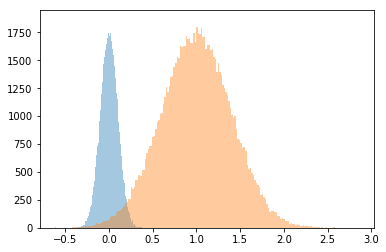

In [122]:
sns.distplot(s, bins=200, kde=False)
sns.distplot(s1, bins=200, kde=False)

In [123]:
data = np.append(s,s1)

In [124]:
class gmm:
    def __init__(self, gsns):
        self.gsns = [gsn(random.random(), random.random(), random.random()) for _gsn in range(gsns)]
        
    def plot(self,x):
        [gsn.plot(x) for gsn in self.gsns]
        
    def e(self, x):
        xpcts = np.array([gsn.pdf(x) for gsn in self.gsns])
        xpct_sum = np.sum(xpcts, axis=0)
        xpcts = [xpct/xpct_sum for xpct in xpcts]
        return xpcts
        
    def m_mean(self, x, xpcts):
        for ind in range(len(self.gsns)):
            self.gsns[ind].mean = np.sum(xpcts[ind]*x)/np.sum(xpcts[ind])
        
    def m_std(self, x, xpcts):
        for ind in range(len(self.gsns)):
            self.gsns[ind].std = np.sum(xpcts[ind]*np.abs(x-self.gsns[ind].mean))/np.sum(xpcts[ind])
            
    def m_mcf(self, x, xpcts):
        for ind in range(len(self.gsns)):
            self.gsns[ind].mcf = np.sum(xpcts[ind])/len(x)
        
    def m(self, x, xpcts):
        self.m_mean(x, xpcts)
        self.m_std(x, xpcts)
        self.m_mcf(x, xpcts)
        
    def update(self, x):
        xpcts = self.e(x)
        self.m(x, xpcts)
        
    def train(self, x, iters):
        [self.update(x) for iter in range(iters)]
        self.print_info()
        
    def print_info(self):
        for ind in range(len(self.gsns)): 
            print("Gaussian #" + str(ind) + ":")
            self.gsns[ind].print_info()

In [125]:
class gsn:
    def __init__(self, mean, std, mcf):
        self.mean = mean
        self.std = std
        self.mcf = mcf
    
    def pdf(self, x):
        return self.mcf * stats.norm(self.mean, self.std).pdf(x)
        
    def plot(self, x):
        plt.plot(x, self.pdf(x))
        
    def print_info(self):
        print("Mean: " + str(self.mean) + ", Standard Deviation: " + str(self.std) + ", Mixing Coefficient: " + str(self.mcf))
        

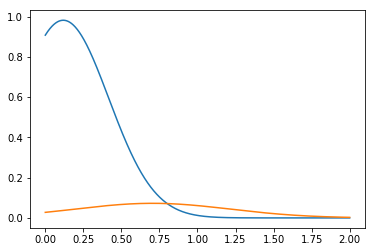

In [126]:
_gmm = gmm(2)
x = np.linspace(0,2,1000)
_gmm.plot(x)

In [127]:
xpcts = _gmm.e(data)

In [128]:
_gmm.train(data,100)

Gaussian #0:
Mean: -0.0005769665301234082, Standard Deviation: 0.07917031994557784, Mixing Coefficient: 0.5048492330214274
Gaussian #1:
Mean: 1.0099556600755213, Standard Deviation: 0.3108957599342241, Mixing Coefficient: 0.49515076697857274


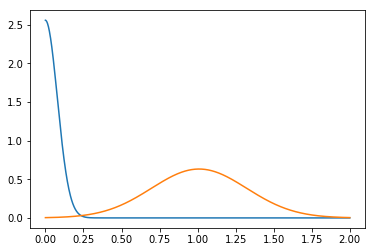

In [118]:
_gmm.plot(x)

529